In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import SGD

from keras.utils.vis_utils import plot_model

import random

import itertools
import time

def softmax(x):
    ex = np.exp(x)
    sum_ex = np.sum( np.exp(x))
    return ex/sum_ex
  
(x_train, y_train_num), (x_test, y_test_num) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

num_units = [5, 10, 15, 25, 50, 100]
activations = ['relu', 'sigmoid', 'tanh']
learning_rate = [0.1, 1, 10]
batch_size = [10, 100]
epochs = [10, 25, 50]

hyperparameters = itertools.product(num_units, activations, learning_rate, batch_size, epochs)
hp_list = np.zeros(len(num_units)*len(activations)*len(learning_rate)*len(batch_size)*len(epochs),
                  dtype=[('units', 'int'), ('actv','S10'), ('lr', 'float'), ('batch', 'int'), ('epochs', 'int')])
for i,j in enumerate(hyperparameters):
  hp_list[i]=j
sample_size = 1000
num_teams = 100
model_avg = np.zeros((num_teams, 4, 50))
param_array = np.zeros(num_teams, dtype=[('units', 'int'), ('actv','S10'), ('lr', 'float'), ('batch', 'int'), ('epochs', 'int')])
counts=np.ones(hp_list.shape[0])
probs=softmax(counts)
probs_array = np.zeros((num_teams, probs.shape[0]))
alpha = 3 #Parameter to alter probabilities
for k in range(0,num_teams):
  n_set = np.arange(len(y_train))
  sample = np.random.choice(a=n_set, size=sample_size)
  x_subset = x_train[sample]
  y_subset = y_train[sample]
  params = np.random.choice(hp_list, p=probs)
  param_array[k] = params
  params[1] = params[1]
  print("Training model", k+1)
  print("Hidden Units:", params[0], "Activation:", params[1].decode(), "Learn. rate:", params[2])
  print("Batch size:", params[3], "Epochs:", params[4])
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(params[0], input_dim = 784, activation=params[1].decode()))
  model.add(Dense(10, activation='softmax'))

  sgd=SGD(lr=params[2])
  model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
  history = model.fit(x_subset, y_subset,
                    batch_size=params[3], epochs=params[4], verbose=1, validation_data=(x_test, y_test))
  probs_array[k] = probs
  if history.history['acc'][-1] >= 0.8:
    loc = np.where(hp_list == params)
    counts[loc] += alpha/counts[loc]
    probs = softmax(counts) #softmax ensures that the sum of the probabilities is always 1
  for i in range(params[4]):
    model_avg[k][0][i] = history.history['acc'][i]
    model_avg[k][1][i] = history.history['val_acc'][i]
    model_avg[k][2][i] = history.history['loss'][i]
    model_avg[k][3][i] = history.history['val_loss'][i]

Using TensorFlow backend.
W0723 13:42:56.810034 140427141326656 deprecation_wrapper.py:119] From /home/aa710/crowd_nets/jupyterenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 13:42:56.854138 140427141326656 deprecation_wrapper.py:119] From /home/aa710/crowd_nets/jupyterenv/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 13:42:56.857517 140427141326656 deprecation_wrapper.py:119] From /home/aa710/crowd_nets/jupyterenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 13:42:56.872377 140427141326656 deprecation_wrapper.py:119] From /home/aa710/crowd_nets/jupyterenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_

Training model 1
Hidden Units: 15 Activation: sigmoid Learn. rate: 0.1
Batch size: 100 Epochs: 10


W0723 13:42:57.069148 140427141326656 deprecation.py:323] From /home/aa710/crowd_nets/jupyterenv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0723 13:42:57.137901 140427141326656 deprecation_wrapper.py:119] From /home/aa710/crowd_nets/jupyterenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1000 samples, validate on 10000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 347us/step - loss: 2.3646 - acc: 0.1440 - val_loss: 2.2428 - val_acc: 0.2097
Epoch 2/10
1000/1000 [==============================] - 0s 79us/step - loss: 2.1915 - acc: 0.2650 - val_loss: 2.1315 - val_acc: 0.3685
Epoch 3/10
1000/1000 [==============================] - 0s 79us/step - loss: 2.0892 - acc: 0.4670 - val_loss: 2.0460 - val_acc: 0.5398
Epoch 4/10
1000/1000 [==============================] - 0s 79us/step - loss: 2.0052 - acc: 0.5570 - val_loss: 1.9702 - val_acc: 0.6068
Epoch 5/10
1000/1000 [==============================] - 0s 79us/step - loss: 1.9294 - acc: 0.6140 - val_loss: 1.8996 - val_acc: 0.6246
Epoch 6/10
1000/1000 [==============================] - 0s 80us/step - loss: 1.8577 - acc: 0.6430 - val_loss: 1.8327 - val_acc: 0.6447
Epoch 7/10
1000/1000 [==============================] - 0s 78us/step - loss: 1.7910 - acc: 0.6590 - val_loss: 1.7703 - val_acc: 0.6537
Epoch

Epoch 39/50
1000/1000 [==============================] - 0s 86us/step - loss: 0.0142 - acc: 1.0000 - val_loss: 0.4305 - val_acc: 0.8853
Epoch 40/50
1000/1000 [==============================] - 0s 85us/step - loss: 0.0140 - acc: 1.0000 - val_loss: 0.4299 - val_acc: 0.8859
Epoch 41/50
1000/1000 [==============================] - 0s 86us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.4305 - val_acc: 0.8857
Epoch 42/50
1000/1000 [==============================] - 0s 86us/step - loss: 0.0128 - acc: 1.0000 - val_loss: 0.4294 - val_acc: 0.8864
Epoch 43/50
1000/1000 [==============================] - 0s 87us/step - loss: 0.0123 - acc: 1.0000 - val_loss: 0.4319 - val_acc: 0.8867
Epoch 44/50
1000/1000 [==============================] - 0s 86us/step - loss: 0.0119 - acc: 1.0000 - val_loss: 0.4349 - val_acc: 0.8856
Epoch 45/50
1000/1000 [==============================] - 0s 86us/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.4325 - val_acc: 0.8865
Epoch 46/50
1000/1000 [=========================

1000/1000 [==============================] - 1s 526us/step - loss: 14.4257 - acc: 0.1050 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 48/50
1000/1000 [==============================] - 1s 526us/step - loss: 14.4257 - acc: 0.1050 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 49/50
1000/1000 [==============================] - 1s 524us/step - loss: 14.4257 - acc: 0.1050 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 50/50
1000/1000 [==============================] - 1s 525us/step - loss: 14.4257 - acc: 0.1050 - val_loss: 14.2887 - val_acc: 0.1135
Training model 5
Hidden Units: 5 Activation: tanh Learn. rate: 1.0
Batch size: 100 Epochs: 25
Train on 1000 samples, validate on 10000 samples
Epoch 1/25
1000/1000 [==============================] - 0s 397us/step - loss: 2.1045 - acc: 0.2150 - val_loss: 1.7115 - val_acc: 0.4391
Epoch 2/25
1000/1000 [==============================] - 0s 80us/step - loss: 1.5962 - acc: 0.4870 - val_loss: 1.3576 - val_acc: 0.5833
Epoch 3/25
1000/1000 [====================

1000/1000 [==============================] - 1s 622us/step - loss: 0.0921 - acc: 0.9870 - val_loss: 0.3827 - val_acc: 0.8829
Epoch 31/50
1000/1000 [==============================] - 1s 623us/step - loss: 0.0865 - acc: 0.9920 - val_loss: 0.3926 - val_acc: 0.8823
Epoch 32/50
1000/1000 [==============================] - 1s 625us/step - loss: 0.0813 - acc: 0.9910 - val_loss: 0.3867 - val_acc: 0.8826
Epoch 33/50
1000/1000 [==============================] - 1s 624us/step - loss: 0.0783 - acc: 0.9940 - val_loss: 0.3795 - val_acc: 0.8838
Epoch 34/50
1000/1000 [==============================] - 1s 622us/step - loss: 0.0751 - acc: 0.9930 - val_loss: 0.3804 - val_acc: 0.8860
Epoch 35/50
1000/1000 [==============================] - 1s 626us/step - loss: 0.0708 - acc: 0.9920 - val_loss: 0.3872 - val_acc: 0.8823
Epoch 36/50
1000/1000 [==============================] - 1s 624us/step - loss: 0.0661 - acc: 0.9960 - val_loss: 0.3874 - val_acc: 0.8844
Epoch 37/50
1000/1000 [==============================

Epoch 13/25
1000/1000 [==============================] - 1s 567us/step - loss: 0.0269 - acc: 0.9990 - val_loss: 0.4504 - val_acc: 0.8758
Epoch 14/25
1000/1000 [==============================] - 1s 567us/step - loss: 0.0226 - acc: 1.0000 - val_loss: 0.4482 - val_acc: 0.8763
Epoch 15/25
1000/1000 [==============================] - 1s 567us/step - loss: 0.0200 - acc: 1.0000 - val_loss: 0.4607 - val_acc: 0.8747
Epoch 16/25
1000/1000 [==============================] - 1s 566us/step - loss: 0.0182 - acc: 1.0000 - val_loss: 0.4578 - val_acc: 0.8757
Epoch 17/25
1000/1000 [==============================] - 1s 566us/step - loss: 0.0164 - acc: 1.0000 - val_loss: 0.4587 - val_acc: 0.8754
Epoch 18/25
1000/1000 [==============================] - 1s 567us/step - loss: 0.0149 - acc: 1.0000 - val_loss: 0.4617 - val_acc: 0.8761
Epoch 19/25
1000/1000 [==============================] - 1s 565us/step - loss: 0.0139 - acc: 1.0000 - val_loss: 0.4663 - val_acc: 0.8754
Epoch 20/25
1000/1000 [==================

1000/1000 [==============================] - 0s 91us/step - loss: 0.1139 - acc: 0.9880 - val_loss: 0.3871 - val_acc: 0.8836
Epoch 48/50
1000/1000 [==============================] - 0s 91us/step - loss: 0.1100 - acc: 0.9890 - val_loss: 0.3890 - val_acc: 0.8824
Epoch 49/50
1000/1000 [==============================] - 0s 91us/step - loss: 0.1065 - acc: 0.9930 - val_loss: 0.3865 - val_acc: 0.8835
Epoch 50/50
1000/1000 [==============================] - 0s 90us/step - loss: 0.1034 - acc: 0.9920 - val_loss: 0.3874 - val_acc: 0.8828
Training model 10
Hidden Units: 15 Activation: sigmoid Learn. rate: 1.0
Batch size: 10 Epochs: 25
Train on 1000 samples, validate on 10000 samples
Epoch 1/25
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2502 - acc: 0.5930 - val_loss: 0.7007 - val_acc: 0.7768
Epoch 2/25
1000/1000 [==============================] - 1s 582us/step - loss: 0.5360 - acc: 0.8400 - val_loss: 0.5443 - val_acc: 0.8410
Epoch 3/25
1000/1000 [=============================

1000/1000 [==============================] - 0s 84us/step - loss: 1.9267 - acc: 0.3690 - val_loss: 1.8828 - val_acc: 0.3970
Epoch 5/25
1000/1000 [==============================] - 0s 83us/step - loss: 1.7935 - acc: 0.4600 - val_loss: 1.7252 - val_acc: 0.4612
Epoch 6/25
1000/1000 [==============================] - 0s 84us/step - loss: 1.6318 - acc: 0.5140 - val_loss: 1.5710 - val_acc: 0.5211
Epoch 7/25
1000/1000 [==============================] - 0s 84us/step - loss: 1.4928 - acc: 0.5480 - val_loss: 1.4486 - val_acc: 0.5305
Epoch 8/25
1000/1000 [==============================] - 0s 84us/step - loss: 1.3851 - acc: 0.5640 - val_loss: 1.3479 - val_acc: 0.5816
Epoch 9/25
1000/1000 [==============================] - 0s 84us/step - loss: 1.2836 - acc: 0.6190 - val_loss: 1.2596 - val_acc: 0.6249
Epoch 10/25
1000/1000 [==============================] - 0s 84us/step - loss: 1.2011 - acc: 0.6540 - val_loss: 1.1774 - val_acc: 0.6583
Epoch 11/25
1000/1000 [==============================] - 0s 84us/

Epoch 27/50
1000/1000 [==============================] - 1s 614us/step - loss: 0.2857 - acc: 0.9160 - val_loss: 0.7940 - val_acc: 0.8127
Epoch 28/50
1000/1000 [==============================] - 1s 610us/step - loss: 0.2132 - acc: 0.9360 - val_loss: 0.7258 - val_acc: 0.8315
Epoch 29/50
1000/1000 [==============================] - 1s 611us/step - loss: 0.1565 - acc: 0.9590 - val_loss: 0.7114 - val_acc: 0.8410
Epoch 30/50
1000/1000 [==============================] - 1s 613us/step - loss: 0.1768 - acc: 0.9560 - val_loss: 0.7065 - val_acc: 0.8487
Epoch 31/50
1000/1000 [==============================] - 1s 611us/step - loss: 0.2198 - acc: 0.9280 - val_loss: 0.6999 - val_acc: 0.8440
Epoch 32/50
1000/1000 [==============================] - 1s 613us/step - loss: 0.1392 - acc: 0.9590 - val_loss: 0.7285 - val_acc: 0.8393
Epoch 33/50
1000/1000 [==============================] - 1s 613us/step - loss: 0.1275 - acc: 0.9630 - val_loss: 0.7393 - val_acc: 0.8421
Epoch 34/50
1000/1000 [==================

Epoch 10/25
1000/1000 [==============================] - 1s 665us/step - loss: 14.2484 - acc: 0.1160 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 11/25
1000/1000 [==============================] - 1s 665us/step - loss: 14.2484 - acc: 0.1160 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 12/25
1000/1000 [==============================] - 1s 663us/step - loss: 14.2484 - acc: 0.1160 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 13/25
1000/1000 [==============================] - 1s 662us/step - loss: 14.2484 - acc: 0.1160 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 14/25
1000/1000 [==============================] - 1s 661us/step - loss: 14.2484 - acc: 0.1160 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 15/25
1000/1000 [==============================] - 1s 662us/step - loss: 14.2484 - acc: 0.1160 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 16/25
1000/1000 [==============================] - 1s 664us/step - loss: 14.2484 - acc: 0.1160 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 17/25
1000/1000 [====

Epoch 44/50
1000/1000 [==============================] - 0s 90us/step - loss: 1.1484 - acc: 0.6860 - val_loss: 0.9625 - val_acc: 0.7464
Epoch 45/50
1000/1000 [==============================] - 0s 91us/step - loss: 0.4582 - acc: 0.8320 - val_loss: 1.0054 - val_acc: 0.7280
Epoch 46/50
1000/1000 [==============================] - 0s 90us/step - loss: 0.3984 - acc: 0.8720 - val_loss: 0.9368 - val_acc: 0.7720
Epoch 47/50
1000/1000 [==============================] - 0s 91us/step - loss: 0.3765 - acc: 0.8710 - val_loss: 0.9582 - val_acc: 0.7789
Epoch 48/50
1000/1000 [==============================] - 0s 91us/step - loss: 0.3216 - acc: 0.9070 - val_loss: 0.9623 - val_acc: 0.7480
Epoch 49/50
1000/1000 [==============================] - 0s 91us/step - loss: 0.3639 - acc: 0.8880 - val_loss: 1.4753 - val_acc: 0.6639
Epoch 50/50
1000/1000 [==============================] - 0s 90us/step - loss: 0.4591 - acc: 0.8520 - val_loss: 1.0019 - val_acc: 0.7780
Training model 18
Hidden Units: 10 Activation: r

1000/1000 [==============================] - 1s 647us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 3/10
1000/1000 [==============================] - 1s 649us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 4/10
1000/1000 [==============================] - 1s 644us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 5/10
1000/1000 [==============================] - 1s 644us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 6/10
1000/1000 [==============================] - 1s 645us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 7/10
1000/1000 [==============================] - 1s 644us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 8/10
1000/1000 [==============================] - 1s 640us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 9/10
1000/1000 [=======================

1000/1000 [==============================] - 0s 99us/step - loss: 1.5911 - acc: 0.4090 - val_loss: 1.2869 - val_acc: 0.5434
Epoch 14/50
1000/1000 [==============================] - 0s 98us/step - loss: 1.2250 - acc: 0.5270 - val_loss: 1.6507 - val_acc: 0.4904
Epoch 15/50
1000/1000 [==============================] - 0s 96us/step - loss: 1.4940 - acc: 0.4550 - val_loss: 1.6315 - val_acc: 0.4619
Epoch 16/50
1000/1000 [==============================] - 0s 98us/step - loss: 1.3838 - acc: 0.4820 - val_loss: 1.4034 - val_acc: 0.5236
Epoch 17/50
1000/1000 [==============================] - 0s 95us/step - loss: 1.4107 - acc: 0.4790 - val_loss: 1.6047 - val_acc: 0.4619
Epoch 18/50
1000/1000 [==============================] - 0s 98us/step - loss: 1.3988 - acc: 0.5030 - val_loss: 2.2692 - val_acc: 0.2758
Epoch 19/50
1000/1000 [==============================] - 0s 96us/step - loss: 1.7887 - acc: 0.3550 - val_loss: 1.6892 - val_acc: 0.3354
Epoch 20/50
1000/1000 [==============================] - ETA

1000/1000 [==============================] - 1s 686us/step - loss: 0.0116 - acc: 1.0000 - val_loss: 0.4549 - val_acc: 0.8838
Epoch 22/25
1000/1000 [==============================] - 1s 686us/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.4595 - val_acc: 0.8840
Epoch 23/25
1000/1000 [==============================] - 1s 686us/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.4653 - val_acc: 0.8829
Epoch 24/25
1000/1000 [==============================] - 1s 871us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 0.4629 - val_acc: 0.8834
Epoch 25/25
1000/1000 [==============================] - 1s 685us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.4673 - val_acc: 0.8837
Training model 24
Hidden Units: 15 Activation: sigmoid Learn. rate: 1.0
Batch size: 10 Epochs: 25
Train on 1000 samples, validate on 10000 samples
Epoch 1/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2553 - acc: 0.5670 - val_loss: 0.7944 - val_acc: 0.7589
Epoch 2/25
1000/1000 [========================

Epoch 3/25
1000/1000 [==============================] - 1s 712us/step - loss: 0.3748 - acc: 0.8880 - val_loss: 0.4859 - val_acc: 0.8541
Epoch 4/25
1000/1000 [==============================] - 1s 710us/step - loss: 0.2803 - acc: 0.9310 - val_loss: 0.4879 - val_acc: 0.8514
Epoch 5/25
1000/1000 [==============================] - 1s 711us/step - loss: 0.2063 - acc: 0.9450 - val_loss: 0.4299 - val_acc: 0.8730
Epoch 6/25
1000/1000 [==============================] - 1s 711us/step - loss: 0.1477 - acc: 0.9660 - val_loss: 0.4858 - val_acc: 0.8563
Epoch 7/25
1000/1000 [==============================] - 1s 712us/step - loss: 0.0992 - acc: 0.9830 - val_loss: 0.6054 - val_acc: 0.8219
Epoch 8/25
1000/1000 [==============================] - 1s 710us/step - loss: 0.0735 - acc: 0.9870 - val_loss: 0.4497 - val_acc: 0.8722
Epoch 9/25
1000/1000 [==============================] - 1s 711us/step - loss: 0.0507 - acc: 0.9950 - val_loss: 0.4417 - val_acc: 0.8763
Epoch 10/25
1000/1000 [=========================

Epoch 37/50
1000/1000 [==============================] - 1s 719us/step - loss: 0.1598 - acc: 0.9500 - val_loss: 0.8297 - val_acc: 0.8289
Epoch 38/50
1000/1000 [==============================] - 1s 720us/step - loss: 0.1614 - acc: 0.9520 - val_loss: 0.7777 - val_acc: 0.8372
Epoch 39/50
1000/1000 [==============================] - 1s 718us/step - loss: 0.1855 - acc: 0.9420 - val_loss: 0.7773 - val_acc: 0.8247
Epoch 40/50
1000/1000 [==============================] - 1s 717us/step - loss: 0.1681 - acc: 0.9470 - val_loss: 0.7932 - val_acc: 0.8367
Epoch 41/50
1000/1000 [==============================] - 1s 717us/step - loss: 0.1547 - acc: 0.9490 - val_loss: 0.8295 - val_acc: 0.8209
Epoch 42/50
1000/1000 [==============================] - 1s 719us/step - loss: 0.1786 - acc: 0.9460 - val_loss: 0.9703 - val_acc: 0.8010
Epoch 43/50
1000/1000 [==============================] - 1s 720us/step - loss: 0.1868 - acc: 0.9430 - val_loss: 0.8724 - val_acc: 0.8237
Epoch 44/50
1000/1000 [==================

Epoch 46/50
1000/1000 [==============================] - 1s 726us/step - loss: 0.1888 - acc: 0.9350 - val_loss: 0.8337 - val_acc: 0.8411
Epoch 47/50
1000/1000 [==============================] - 1s 724us/step - loss: 0.1157 - acc: 0.9650 - val_loss: 0.8290 - val_acc: 0.8406
Epoch 48/50
1000/1000 [==============================] - 1s 723us/step - loss: 0.1250 - acc: 0.9590 - val_loss: 0.8635 - val_acc: 0.8120
Epoch 49/50
1000/1000 [==============================] - 1s 725us/step - loss: 0.1304 - acc: 0.9580 - val_loss: 0.8862 - val_acc: 0.8331
Epoch 50/50
1000/1000 [==============================] - 1s 723us/step - loss: 0.1255 - acc: 0.9630 - val_loss: 0.8719 - val_acc: 0.8500
Training model 29
Hidden Units: 10 Activation: tanh Learn. rate: 1.0
Batch size: 10 Epochs: 50
Train on 1000 samples, validate on 10000 samples
Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5339 - acc: 0.4880 - val_loss: 0.9392 - val_acc: 0.6900
Epoch 2/50
1000/1000 [===============

Epoch 4/10
1000/1000 [==============================] - 1s 747us/step - loss: 0.6599 - acc: 0.7680 - val_loss: 0.8610 - val_acc: 0.7384
Epoch 5/10
1000/1000 [==============================] - 1s 747us/step - loss: 0.6553 - acc: 0.7820 - val_loss: 0.6901 - val_acc: 0.7939
Epoch 6/10
1000/1000 [==============================] - 1s 749us/step - loss: 0.6685 - acc: 0.7690 - val_loss: 0.8173 - val_acc: 0.7625
Epoch 7/10
1000/1000 [==============================] - 1s 750us/step - loss: 0.4966 - acc: 0.8390 - val_loss: 0.8570 - val_acc: 0.7597
Epoch 8/10
1000/1000 [==============================] - 1s 751us/step - loss: 0.5476 - acc: 0.8230 - val_loss: 0.7876 - val_acc: 0.7773
Epoch 9/10
1000/1000 [==============================] - 1s 749us/step - loss: 0.5013 - acc: 0.8300 - val_loss: 0.7757 - val_acc: 0.7815
Epoch 10/10
1000/1000 [==============================] - 1s 750us/step - loss: 0.4572 - acc: 0.8510 - val_loss: 0.9569 - val_acc: 0.7477
Training model 31
Hidden Units: 25 Activation: 

Epoch 2/25
1000/1000 [==============================] - 1s 766us/step - loss: 1.0513 - acc: 0.6580 - val_loss: 1.2778 - val_acc: 0.5965
Epoch 3/25
1000/1000 [==============================] - 1s 770us/step - loss: 0.9682 - acc: 0.6940 - val_loss: 0.8512 - val_acc: 0.7470
Epoch 4/25
1000/1000 [==============================] - 1s 766us/step - loss: 0.8401 - acc: 0.7430 - val_loss: 0.7701 - val_acc: 0.7404
Epoch 5/25
1000/1000 [==============================] - 1s 767us/step - loss: 0.6994 - acc: 0.7900 - val_loss: 0.8201 - val_acc: 0.7574
Epoch 6/25
1000/1000 [==============================] - 1s 764us/step - loss: 0.5930 - acc: 0.7970 - val_loss: 0.8278 - val_acc: 0.7511
Epoch 7/25
1000/1000 [==============================] - 1s 765us/step - loss: 0.5499 - acc: 0.8130 - val_loss: 0.7742 - val_acc: 0.7774
Epoch 8/25
1000/1000 [==============================] - 1s 816us/step - loss: 0.6536 - acc: 0.8000 - val_loss: 0.8394 - val_acc: 0.7508
Epoch 9/25
1000/1000 [==========================

Epoch 10/50
1000/1000 [==============================] - 0s 116us/step - loss: 0.4876 - acc: 0.8860 - val_loss: 0.5415 - val_acc: 0.8516
Epoch 11/50
1000/1000 [==============================] - 0s 115us/step - loss: 0.4570 - acc: 0.8890 - val_loss: 0.5234 - val_acc: 0.8565
Epoch 12/50
1000/1000 [==============================] - 0s 115us/step - loss: 0.4310 - acc: 0.9000 - val_loss: 0.5081 - val_acc: 0.8585
Epoch 13/50
1000/1000 [==============================] - 0s 115us/step - loss: 0.4089 - acc: 0.9040 - val_loss: 0.4916 - val_acc: 0.8612
Epoch 14/50
1000/1000 [==============================] - 0s 116us/step - loss: 0.3849 - acc: 0.9050 - val_loss: 0.4855 - val_acc: 0.8633
Epoch 15/50
1000/1000 [==============================] - 0s 114us/step - loss: 0.3669 - acc: 0.9080 - val_loss: 0.4723 - val_acc: 0.8645
Epoch 16/50
1000/1000 [==============================] - 0s 115us/step - loss: 0.3515 - acc: 0.9130 - val_loss: 0.4574 - val_acc: 0.8692
Epoch 17/50
1000/1000 [==================

Epoch 19/25
1000/1000 [==============================] - 0s 147us/step - loss: 0.2709 - acc: 0.9450 - val_loss: 0.4258 - val_acc: 0.8743
Epoch 20/25
1000/1000 [==============================] - 0s 145us/step - loss: 0.2579 - acc: 0.9520 - val_loss: 0.4260 - val_acc: 0.8733
Epoch 21/25
1000/1000 [==============================] - 0s 147us/step - loss: 0.2491 - acc: 0.9530 - val_loss: 0.4217 - val_acc: 0.8738
Epoch 22/25
1000/1000 [==============================] - 0s 147us/step - loss: 0.2396 - acc: 0.9550 - val_loss: 0.4193 - val_acc: 0.8743
Epoch 23/25
1000/1000 [==============================] - 0s 147us/step - loss: 0.2315 - acc: 0.9600 - val_loss: 0.4150 - val_acc: 0.8769
Epoch 24/25
1000/1000 [==============================] - 0s 147us/step - loss: 0.2258 - acc: 0.9610 - val_loss: 0.4107 - val_acc: 0.8765
Epoch 25/25
1000/1000 [==============================] - 0s 147us/step - loss: 0.2171 - acc: 0.9620 - val_loss: 0.4090 - val_acc: 0.8778
Training model 36
Hidden Units: 15 Activa

1000/1000 [==============================] - 3s 3ms/step - loss: 1.2521 - acc: 0.5920 - val_loss: 0.6259 - val_acc: 0.8289
Epoch 2/25
1000/1000 [==============================] - 1s 813us/step - loss: 0.5366 - acc: 0.8410 - val_loss: 0.5133 - val_acc: 0.8502
Epoch 3/25
1000/1000 [==============================] - 1s 812us/step - loss: 0.3625 - acc: 0.9060 - val_loss: 0.4301 - val_acc: 0.8679
Epoch 4/25
1000/1000 [==============================] - 1s 815us/step - loss: 0.2613 - acc: 0.9270 - val_loss: 0.4322 - val_acc: 0.8651
Epoch 5/25
1000/1000 [==============================] - 1s 814us/step - loss: 0.1844 - acc: 0.9500 - val_loss: 0.4177 - val_acc: 0.8749
Epoch 6/25
1000/1000 [==============================] - 1s 813us/step - loss: 0.1672 - acc: 0.9470 - val_loss: 0.4517 - val_acc: 0.8618
Epoch 7/25
1000/1000 [==============================] - 1s 814us/step - loss: 0.1246 - acc: 0.9650 - val_loss: 0.4107 - val_acc: 0.8803
Epoch 8/25
1000/1000 [==============================] - 1s 81

Epoch 9/25
1000/1000 [==============================] - 1s 828us/step - loss: 0.0354 - acc: 0.9970 - val_loss: 0.4385 - val_acc: 0.8820
Epoch 10/25
1000/1000 [==============================] - 1s 828us/step - loss: 0.0324 - acc: 0.9950 - val_loss: 0.4513 - val_acc: 0.8776
Epoch 11/25
1000/1000 [==============================] - 1s 828us/step - loss: 0.0268 - acc: 0.9990 - val_loss: 0.4715 - val_acc: 0.8747
Epoch 12/25
1000/1000 [==============================] - 1s 832us/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.4631 - val_acc: 0.8782
Epoch 13/25
1000/1000 [==============================] - 1s 832us/step - loss: 0.0169 - acc: 1.0000 - val_loss: 0.4637 - val_acc: 0.8784
Epoch 14/25
1000/1000 [==============================] - 1s 829us/step - loss: 0.0146 - acc: 1.0000 - val_loss: 0.4667 - val_acc: 0.8784
Epoch 15/25
1000/1000 [==============================] - 1s 830us/step - loss: 0.0127 - acc: 1.0000 - val_loss: 0.4752 - val_acc: 0.8785
Epoch 16/25
1000/1000 [===================

Epoch 17/25
1000/1000 [==============================] - 1s 843us/step - loss: 0.0159 - acc: 1.0000 - val_loss: 0.4675 - val_acc: 0.8716
Epoch 18/25
1000/1000 [==============================] - 1s 844us/step - loss: 0.0144 - acc: 1.0000 - val_loss: 0.4797 - val_acc: 0.8717
Epoch 19/25
1000/1000 [==============================] - 1s 844us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.4762 - val_acc: 0.8722
Epoch 20/25
1000/1000 [==============================] - 1s 845us/step - loss: 0.0123 - acc: 1.0000 - val_loss: 0.4793 - val_acc: 0.8721
Epoch 21/25
1000/1000 [==============================] - 1s 844us/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.4895 - val_acc: 0.8699
Epoch 22/25
1000/1000 [==============================] - 1s 844us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.4827 - val_acc: 0.8734
Epoch 23/25
1000/1000 [==============================] - 1s 843us/step - loss: 0.0102 - acc: 1.0000 - val_loss: 0.4959 - val_acc: 0.8702
Epoch 24/25
1000/1000 [==================

1000/1000 [==============================] - 1s 863us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.5054 - val_acc: 0.8690
Epoch 25/25
1000/1000 [==============================] - 1s 863us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.5118 - val_acc: 0.8669
Training model 45
Hidden Units: 25 Activation: relu Learn. rate: 0.1
Batch size: 100 Epochs: 50
Train on 1000 samples, validate on 10000 samples
Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2303 - acc: 0.1770 - val_loss: 2.0625 - val_acc: 0.2740
Epoch 2/50
1000/1000 [==============================] - 0s 126us/step - loss: 1.9243 - acc: 0.3610 - val_loss: 1.7210 - val_acc: 0.5133
Epoch 3/50
1000/1000 [==============================] - 0s 127us/step - loss: 1.5848 - acc: 0.5800 - val_loss: 1.3867 - val_acc: 0.6705
Epoch 4/50
1000/1000 [==============================] - 0s 128us/step - loss: 1.2770 - acc: 0.6790 - val_loss: 1.1074 - val_acc: 0.7394
Epoch 5/50
1000/1000 [=============================

Epoch 7/25
1000/1000 [==============================] - 1s 887us/step - loss: 0.1165 - acc: 0.9730 - val_loss: 0.4660 - val_acc: 0.8638
Epoch 8/25
1000/1000 [==============================] - 1s 887us/step - loss: 0.0810 - acc: 0.9870 - val_loss: 0.4769 - val_acc: 0.8611
Epoch 9/25
1000/1000 [==============================] - 1s 887us/step - loss: 0.0551 - acc: 0.9950 - val_loss: 0.4399 - val_acc: 0.8748
Epoch 10/25
1000/1000 [==============================] - 1s 882us/step - loss: 0.0397 - acc: 0.9980 - val_loss: 0.4507 - val_acc: 0.8711
Epoch 11/25
1000/1000 [==============================] - 1s 887us/step - loss: 0.0306 - acc: 1.0000 - val_loss: 0.4509 - val_acc: 0.8735
Epoch 12/25
1000/1000 [==============================] - 1s 885us/step - loss: 0.0277 - acc: 0.9990 - val_loss: 0.4564 - val_acc: 0.8727
Epoch 13/25
1000/1000 [==============================] - 1s 886us/step - loss: 0.0248 - acc: 0.9980 - val_loss: 0.4695 - val_acc: 0.8693
Epoch 14/25
1000/1000 [=====================

Epoch 15/25
1000/1000 [==============================] - 1s 913us/step - loss: 0.0310 - acc: 0.9950 - val_loss: 0.4565 - val_acc: 0.8772
Epoch 16/25
1000/1000 [==============================] - 1s 913us/step - loss: 0.0235 - acc: 0.9980 - val_loss: 0.4632 - val_acc: 0.8763
Epoch 17/25
1000/1000 [==============================] - 1s 906us/step - loss: 0.0212 - acc: 0.9990 - val_loss: 0.4537 - val_acc: 0.8784
Epoch 18/25
1000/1000 [==============================] - 1s 907us/step - loss: 0.0185 - acc: 0.9980 - val_loss: 0.4634 - val_acc: 0.8769
Epoch 19/25
1000/1000 [==============================] - 1s 912us/step - loss: 0.0171 - acc: 0.9990 - val_loss: 0.4706 - val_acc: 0.8762
Epoch 20/25
1000/1000 [==============================] - 1s 908us/step - loss: 0.0158 - acc: 0.9990 - val_loss: 0.4623 - val_acc: 0.8766
Epoch 21/25
1000/1000 [==============================] - 1s 912us/step - loss: 0.0148 - acc: 0.9990 - val_loss: 0.4657 - val_acc: 0.8771
Epoch 22/25
1000/1000 [==================

Epoch 23/25
1000/1000 [==============================] - 1s 917us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.4208 - val_acc: 0.8895
Epoch 24/25
1000/1000 [==============================] - 1s 936us/step - loss: 0.0100 - acc: 1.0000 - val_loss: 0.4240 - val_acc: 0.8890
Epoch 25/25
1000/1000 [==============================] - 1s 949us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.4223 - val_acc: 0.8893
Training model 51
Hidden Units: 15 Activation: sigmoid Learn. rate: 1.0
Batch size: 10 Epochs: 25
Train on 1000 samples, validate on 10000 samples
Epoch 1/25
1000/1000 [==============================] - 3s 3ms/step - loss: 1.2496 - acc: 0.5830 - val_loss: 0.7040 - val_acc: 0.7879
Epoch 2/25
1000/1000 [==============================] - 1s 948us/step - loss: 0.5105 - acc: 0.8540 - val_loss: 0.5195 - val_acc: 0.8400
Epoch 3/25
1000/1000 [==============================] - 1s 949us/step - loss: 0.3540 - acc: 0.8900 - val_loss: 0.6002 - val_acc: 0.8182
Epoch 4/25
1000/1000 [==============

Epoch 5/25
1000/1000 [==============================] - 1s 944us/step - loss: 0.2117 - acc: 0.9360 - val_loss: 0.4957 - val_acc: 0.8484
Epoch 6/25
1000/1000 [==============================] - 1s 935us/step - loss: 0.1660 - acc: 0.9540 - val_loss: 0.4274 - val_acc: 0.8772
Epoch 7/25
1000/1000 [==============================] - 1s 934us/step - loss: 0.0974 - acc: 0.9790 - val_loss: 0.4581 - val_acc: 0.8672
Epoch 8/25
1000/1000 [==============================] - 1s 934us/step - loss: 0.0816 - acc: 0.9840 - val_loss: 0.4364 - val_acc: 0.8759
Epoch 9/25
1000/1000 [==============================] - 1s 936us/step - loss: 0.0562 - acc: 0.9940 - val_loss: 0.4607 - val_acc: 0.8703
Epoch 10/25
1000/1000 [==============================] - 1s 934us/step - loss: 0.0421 - acc: 0.9980 - val_loss: 0.4325 - val_acc: 0.8804
Epoch 11/25
1000/1000 [==============================] - 1s 935us/step - loss: 0.0347 - acc: 0.9980 - val_loss: 0.4333 - val_acc: 0.8838
Epoch 12/25
1000/1000 [=======================

Epoch 13/25
1000/1000 [==============================] - 1s 959us/step - loss: 0.0282 - acc: 0.9980 - val_loss: 0.4152 - val_acc: 0.8793
Epoch 14/25
1000/1000 [==============================] - 1s 958us/step - loss: 0.0246 - acc: 0.9990 - val_loss: 0.4252 - val_acc: 0.8806
Epoch 15/25
1000/1000 [==============================] - 1s 959us/step - loss: 0.0207 - acc: 0.9990 - val_loss: 0.4305 - val_acc: 0.8777
Epoch 16/25
1000/1000 [==============================] - 1s 958us/step - loss: 0.0191 - acc: 0.9990 - val_loss: 0.4325 - val_acc: 0.8779
Epoch 17/25
1000/1000 [==============================] - 1s 958us/step - loss: 0.0169 - acc: 1.0000 - val_loss: 0.4358 - val_acc: 0.8806
Epoch 18/25
1000/1000 [==============================] - 1s 959us/step - loss: 0.0155 - acc: 1.0000 - val_loss: 0.4408 - val_acc: 0.8784
Epoch 19/25
1000/1000 [==============================] - 1s 958us/step - loss: 0.0142 - acc: 1.0000 - val_loss: 0.4406 - val_acc: 0.8795
Epoch 20/25
1000/1000 [==================

Epoch 21/25
1000/1000 [==============================] - 1s 982us/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.4589 - val_acc: 0.8855
Epoch 22/25
1000/1000 [==============================] - 1s 982us/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.4616 - val_acc: 0.8852
Epoch 23/25
1000/1000 [==============================] - 1s 979us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 0.4646 - val_acc: 0.8852
Epoch 24/25
1000/1000 [==============================] - 1s 982us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.4651 - val_acc: 0.8850
Epoch 25/25
1000/1000 [==============================] - 1s 982us/step - loss: 0.0086 - acc: 1.0000 - val_loss: 0.4697 - val_acc: 0.8849
Training model 58
Hidden Units: 15 Activation: sigmoid Learn. rate: 1.0
Batch size: 10 Epochs: 25
Train on 1000 samples, validate on 10000 samples
Epoch 1/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2853 - acc: 0.5640 - val_loss: 0.7470 - val_acc: 0.7527
Epoch 2/25
1000/1000 [============

Epoch 3/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4017 - acc: 0.8760 - val_loss: 0.5555 - val_acc: 0.8177
Epoch 4/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3189 - acc: 0.9090 - val_loss: 0.4908 - val_acc: 0.8544
Epoch 5/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2275 - acc: 0.9350 - val_loss: 0.4712 - val_acc: 0.8608
Epoch 6/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1784 - acc: 0.9540 - val_loss: 0.4418 - val_acc: 0.8695
Epoch 7/25
1000/1000 [==============================] - 1s 997us/step - loss: 0.1467 - acc: 0.9620 - val_loss: 0.4872 - val_acc: 0.8555
Epoch 8/25
1000/1000 [==============================] - 1s 996us/step - loss: 0.0971 - acc: 0.9780 - val_loss: 0.4627 - val_acc: 0.8668
Epoch 9/25
1000/1000 [==============================] - 1s 996us/step - loss: 0.0762 - acc: 0.9850 - val_loss: 0.6056 - val_acc: 0.8174
Epoch 10/25
1000/1000 [==============================] -

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0421 - acc: 0.9940 - val_loss: 0.4551 - val_acc: 0.8734
Epoch 12/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0335 - acc: 0.9960 - val_loss: 0.4556 - val_acc: 0.8731
Epoch 13/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0287 - acc: 0.9960 - val_loss: 0.4558 - val_acc: 0.8737
Epoch 14/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0258 - acc: 0.9970 - val_loss: 0.4582 - val_acc: 0.8757
Epoch 15/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0217 - acc: 0.9980 - val_loss: 0.4596 - val_acc: 0.8726
Epoch 16/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0194 - acc: 0.9980 - val_loss: 0.4677 - val_acc: 0.8747
Epoch 17/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0172 - acc: 1.0000 - val_loss: 0.4727 - val_acc: 0.8761
Epoch 18/25
1000/1000 [==============================] - 1s 1ms/ste

Epoch 20/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0123 - acc: 1.0000 - val_loss: 0.4396 - val_acc: 0.8861
Epoch 21/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0116 - acc: 1.0000 - val_loss: 0.4378 - val_acc: 0.8855
Epoch 22/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.4402 - val_acc: 0.8854
Epoch 23/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0100 - acc: 1.0000 - val_loss: 0.4431 - val_acc: 0.8843
Epoch 24/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.4465 - val_acc: 0.8843
Epoch 25/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0089 - acc: 1.0000 - val_loss: 0.4463 - val_acc: 0.8852
Training model 65
Hidden Units: 15 Activation: sigmoid Learn. rate: 1.0
Batch size: 10 Epochs: 25
Train on 1000 samples, validate on 10000 samples
Epoch 1/25
1000/1000 [=====================

1000/1000 [==============================] - 1s 1ms/step - loss: 0.5428 - acc: 0.8400 - val_loss: 0.5697 - val_acc: 0.8232
Epoch 3/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3711 - acc: 0.8940 - val_loss: 0.5184 - val_acc: 0.8363
Epoch 4/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2755 - acc: 0.9240 - val_loss: 0.4579 - val_acc: 0.8615
Epoch 5/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2188 - acc: 0.9440 - val_loss: 0.4186 - val_acc: 0.8778
Epoch 6/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1309 - acc: 0.9730 - val_loss: 0.4806 - val_acc: 0.8559
Epoch 7/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1242 - acc: 0.9680 - val_loss: 0.6143 - val_acc: 0.8152
Epoch 8/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1080 - acc: 0.9710 - val_loss: 0.4488 - val_acc: 0.8703
Epoch 9/25
1000/1000 [==============================] - 1s 1ms/step - los

Epoch 11/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0325 - acc: 0.9990 - val_loss: 0.4259 - val_acc: 0.8843
Epoch 12/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0258 - acc: 1.0000 - val_loss: 0.4322 - val_acc: 0.8845
Epoch 13/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0220 - acc: 1.0000 - val_loss: 0.4402 - val_acc: 0.8840
Epoch 14/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0194 - acc: 1.0000 - val_loss: 0.4382 - val_acc: 0.8811
Epoch 15/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0174 - acc: 1.0000 - val_loss: 0.4390 - val_acc: 0.8857
Epoch 16/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0153 - acc: 1.0000 - val_loss: 0.4481 - val_acc: 0.8815
Epoch 17/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.4428 - val_acc: 0.8852
Epoch 18/25
1000/1000 [==============================] 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0120 - acc: 1.0000 - val_loss: 0.4677 - val_acc: 0.8777
Epoch 20/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0112 - acc: 1.0000 - val_loss: 0.4633 - val_acc: 0.8801
Epoch 21/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.4694 - val_acc: 0.8792
Epoch 22/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0099 - acc: 1.0000 - val_loss: 0.4697 - val_acc: 0.8806
Epoch 23/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.4705 - val_acc: 0.8794
Epoch 24/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4742 - val_acc: 0.8785
Epoch 25/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0081 - acc: 1.0000 - val_loss: 0.4756 - val_acc: 0.8789
Training model 72
Hidden Units: 15 Activation: sigmoid Learn. rate:

1000/1000 [==============================] - 5s 5ms/step - loss: 1.2649 - acc: 0.5680 - val_loss: 0.7649 - val_acc: 0.7378
Epoch 2/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5985 - acc: 0.8230 - val_loss: 0.6273 - val_acc: 0.7760
Epoch 3/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4332 - acc: 0.8750 - val_loss: 0.5966 - val_acc: 0.8124
Epoch 4/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3160 - acc: 0.9010 - val_loss: 0.4435 - val_acc: 0.8627
Epoch 5/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2185 - acc: 0.9390 - val_loss: 0.4615 - val_acc: 0.8588
Epoch 6/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1392 - acc: 0.9660 - val_loss: 0.4146 - val_acc: 0.8755
Epoch 7/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1076 - acc: 0.9760 - val_loss: 0.4299 - val_acc: 0.8736
Epoch 8/25
1000/1000 [==============================] - 1s 1ms/step - los

Epoch 10/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0409 - acc: 0.9970 - val_loss: 0.4539 - val_acc: 0.8754
Epoch 11/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0314 - acc: 0.9980 - val_loss: 0.4623 - val_acc: 0.8724
Epoch 12/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0282 - acc: 0.9980 - val_loss: 0.4744 - val_acc: 0.8707
Epoch 13/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0248 - acc: 0.9980 - val_loss: 0.4640 - val_acc: 0.8758
Epoch 14/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0213 - acc: 0.9980 - val_loss: 0.4637 - val_acc: 0.8790
Epoch 15/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0196 - acc: 0.9980 - val_loss: 0.4674 - val_acc: 0.8789
Epoch 16/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0172 - acc: 0.9980 - val_loss: 0.4726 - val_acc: 0.8757
Epoch 17/25
1000/1000 [==============================] 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0213 - acc: 0.9990 - val_loss: 0.4629 - val_acc: 0.8748
Epoch 19/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0197 - acc: 0.9990 - val_loss: 0.4736 - val_acc: 0.8722
Epoch 20/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0180 - acc: 0.9990 - val_loss: 0.4799 - val_acc: 0.8731
Epoch 21/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0170 - acc: 0.9990 - val_loss: 0.4783 - val_acc: 0.8729
Epoch 22/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0161 - acc: 0.9990 - val_loss: 0.4798 - val_acc: 0.8731
Epoch 23/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0148 - acc: 0.9990 - val_loss: 0.4809 - val_acc: 0.8724
Epoch 24/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0140 - acc: 0.9990 - val_loss: 0.4802 - val_acc: 0.8747
Epoch 25/25
1000/1000 [==============================] - 1s 1ms/ste

1000/1000 [==============================] - 5s 5ms/step - loss: 1.2088 - acc: 0.6220 - val_loss: 0.6811 - val_acc: 0.7995
Epoch 2/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5282 - acc: 0.8520 - val_loss: 0.5439 - val_acc: 0.8321
Epoch 3/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3855 - acc: 0.8900 - val_loss: 0.4434 - val_acc: 0.8655
Epoch 4/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2599 - acc: 0.9290 - val_loss: 0.4809 - val_acc: 0.8546
Epoch 5/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2150 - acc: 0.9440 - val_loss: 0.4315 - val_acc: 0.8685
Epoch 6/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1372 - acc: 0.9740 - val_loss: 0.4418 - val_acc: 0.8692
Epoch 7/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1017 - acc: 0.9820 - val_loss: 0.4275 - val_acc: 0.8736
Epoch 8/25
1000/1000 [==============================] - 2s 2ms/step - los

Epoch 10/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0386 - acc: 0.9970 - val_loss: 0.4365 - val_acc: 0.8739
Epoch 11/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0321 - acc: 0.9980 - val_loss: 0.4398 - val_acc: 0.8765
Epoch 12/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0253 - acc: 1.0000 - val_loss: 0.4478 - val_acc: 0.8751
Epoch 13/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0220 - acc: 0.9990 - val_loss: 0.4426 - val_acc: 0.8761
Epoch 14/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0189 - acc: 1.0000 - val_loss: 0.4441 - val_acc: 0.8766
Epoch 15/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0166 - acc: 1.0000 - val_loss: 0.4528 - val_acc: 0.8767
Epoch 16/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0151 - acc: 1.0000 - val_loss: 0.4645 - val_acc: 0.8760
Epoch 17/25
1000/1000 [==============================] 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0238 - acc: 0.9990 - val_loss: 0.4767 - val_acc: 0.8753
Epoch 19/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0220 - acc: 0.9990 - val_loss: 0.4698 - val_acc: 0.8784
Epoch 20/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0205 - acc: 0.9990 - val_loss: 0.4903 - val_acc: 0.8741
Epoch 21/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0192 - acc: 0.9990 - val_loss: 0.4863 - val_acc: 0.8755
Epoch 22/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0180 - acc: 0.9990 - val_loss: 0.4864 - val_acc: 0.8762
Epoch 23/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0172 - acc: 0.9990 - val_loss: 0.4830 - val_acc: 0.8757
Epoch 24/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0162 - acc: 0.9990 - val_loss: 0.4920 - val_acc: 0.8749
Epoch 25/25
1000/1000 [==============================] - 1s 1ms/ste

1000/1000 [==============================] - 6s 6ms/step - loss: 1.2134 - acc: 0.6100 - val_loss: 0.6876 - val_acc: 0.7853
Epoch 2/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5478 - acc: 0.8370 - val_loss: 0.5567 - val_acc: 0.8446
Epoch 3/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3809 - acc: 0.8760 - val_loss: 0.4725 - val_acc: 0.8516
Epoch 4/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2830 - acc: 0.9200 - val_loss: 0.4817 - val_acc: 0.8533
Epoch 5/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2155 - acc: 0.9370 - val_loss: 0.4611 - val_acc: 0.8641
Epoch 6/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1589 - acc: 0.9580 - val_loss: 0.5139 - val_acc: 0.8412
Epoch 7/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1463 - acc: 0.9580 - val_loss: 0.4031 - val_acc: 0.8816
Epoch 8/25
1000/1000 [==============================] - 2s 2ms/step - los

Epoch 10/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0490 - acc: 0.9920 - val_loss: 0.4093 - val_acc: 0.8835
Epoch 11/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0375 - acc: 0.9970 - val_loss: 0.4175 - val_acc: 0.8819
Epoch 12/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0304 - acc: 0.9970 - val_loss: 0.4257 - val_acc: 0.8811
Epoch 13/25
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0265 - acc: 0.9980 - val_loss: 0.4243 - val_acc: 0.8832
Epoch 14/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0235 - acc: 0.9980 - val_loss: 0.4481 - val_acc: 0.8769
Epoch 15/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0208 - acc: 1.0000 - val_loss: 0.4391 - val_acc: 0.8798
Epoch 16/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.4416 - val_acc: 0.8808
Epoch 17/25
1000/1000 [==============================] 

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0139 - acc: 1.0000 - val_loss: 0.4338 - val_acc: 0.8833
Epoch 19/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0126 - acc: 1.0000 - val_loss: 0.4356 - val_acc: 0.8820
Epoch 20/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0119 - acc: 1.0000 - val_loss: 0.4369 - val_acc: 0.8827
Epoch 21/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0110 - acc: 1.0000 - val_loss: 0.4406 - val_acc: 0.8822
Epoch 22/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0103 - acc: 1.0000 - val_loss: 0.4437 - val_acc: 0.8824
Epoch 23/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.4465 - val_acc: 0.8823
Epoch 24/25
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.4464 - val_acc: 0.8825
Epoch 25/25
1000/1000 [==============================] - 2s 2ms/ste

1000/1000 [==============================] - 389s 389ms/step - loss: 1.3881 - acc: 0.5430 - val_loss: 0.8099 - val_acc: 0.7667
Epoch 2/25
1000/1000 [==============================] - 326s 326ms/step - loss: 0.6743 - acc: 0.7840 - val_loss: 0.5151 - val_acc: 0.8597
Epoch 3/25
1000/1000 [==============================] - 310s 310ms/step - loss: 0.4548 - acc: 0.8600 - val_loss: 0.5523 - val_acc: 0.8373
Epoch 4/25
1000/1000 [==============================] - 326s 326ms/step - loss: 0.3487 - acc: 0.8840 - val_loss: 0.4858 - val_acc: 0.8538
Epoch 5/25
1000/1000 [==============================] - 325s 325ms/step - loss: 0.2469 - acc: 0.9260 - val_loss: 0.4412 - val_acc: 0.8699
Epoch 6/25
1000/1000 [==============================] - 321s 321ms/step - loss: 0.1714 - acc: 0.9500 - val_loss: 0.4727 - val_acc: 0.8600
Epoch 7/25
1000/1000 [==============================] - 321s 321ms/step - loss: 0.1460 - acc: 0.9590 - val_loss: 0.4271 - val_acc: 0.8784
Epoch 8/25
1000/1000 [=======================

Text(0, 0.5, 'Probability')

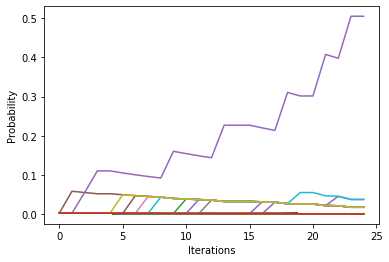

In [3]:
import matplotlib.pyplot as plt
for i in range(probs_array.T.shape[0]):
  plt.plot(probs_array.T[i])
plt.xlabel('Iterations')
plt.ylabel('Probability')

In [1]:
for i in range(probs_array.T.shape[0]):
  plt.plot(probs_array.T[i])
plt.xlabel('Iterations')
plt.ylabel('Probability')

NameError: name 'probs_array' is not defined